### Importing Files

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing import sequence
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
df=pd.read_csv("Sentiment.csv")
df.head()

,id,candidate,candidate_confidence,relevant_yn,relevant_yn_confidence,sentiment,sentiment_confidence,subject_matter,subject_matter_confidence,candidate_gold,...,relevant_yn_gold,retweet_count,sentiment_gold,subject_matter_gold,text,tweet_coord,tweet_created,tweet_id,tweet_location,user_timezone
0,1,No candidate mentioned,1.0,yes,1.0,Neutral,0.6578,None of the above,1.0000,NaN,...,NaN,5,NaN,NaN,RT @NancyLeeGrahn: How did everyone feel about...,NaN,2015-08-07 09:54:46 -0700,629697200650592256,NaN,Quito
1,2,Scott Walker,1.0,yes,1.0,Positive,0.6333,None of the above,1.0000,NaN,...,NaN,26,NaN,NaN,RT @ScottWalker: Didn't catch the full #GOPdeb...,NaN,2015-08-07 09:54:46 -0700,629697199560069120,NaN,NaN
2,3,No candidate mentioned,1.0,yes,1.0,Neutral,0.6629,None of the above,0.6629,NaN,...,NaN,27,NaN,NaN,RT @TJMShow: No mention of Tamir Rice and the ...,NaN,2015-08-07 09:54:46 -0700,629697199312482304,NaN,NaN
3,4,No candidate mentioned,1.0,yes,1.0,Positive,1.0000,None of the above,0.7039,NaN,...,NaN,138,NaN,NaN,RT @RobGeorge: That Carly Fiorina is trending ...,NaN,2015-08-07 09:54:45 -0700,629697197118861312,Texas,Central Time (US & Canada)
4,5,Donald Trump,1.0,yes,1.0,Positive,0.7045,None of the above,1.0000,NaN,...,NaN,156,NaN,NaN,RT @DanScavino: #GOPDebate w/ @realDonaldTrump...,NaN,2015-08-07 09:54:45 -0700,629697196967903232,NaN,Arizona


In [3]:
df.columns

Index(['id', 'candidate', 'candidate_confidence', 'relevant_yn',
       'relevant_yn_confidence', 'sentiment', 'sentiment_confidence',
       'subject_matter', 'subject_matter_confidence', 'candidate_gold', 'name',
       'relevant_yn_gold', 'retweet_count', 'sentiment_gold',
       'subject_matter_gold', 'text', 'tweet_coord', 'tweet_created',
       'tweet_id', 'tweet_location', 'user_timezone'],
      dtype='object')

In [4]:
df1=df.copy()

In [5]:
df1.drop(columns=['id', 'candidate', 'candidate_confidence', 'relevant_yn',
       'relevant_yn_confidence', 'sentiment_confidence',
       'subject_matter', 'subject_matter_confidence', 'candidate_gold', 'name',
       'relevant_yn_gold', 'retweet_count', 'sentiment_gold',
       'subject_matter_gold', 'tweet_coord', 'tweet_created',
       'tweet_id', 'tweet_location', 'user_timezone'],inplace=True)

In [6]:
print(df1.shape)
df1.head()

(13871, 2)


,sentiment,text
0,Neutral,RT @NancyLeeGrahn: How did everyone feel about...
1,Positive,RT @ScottWalker: Didn't catch the full #GOPdeb...
2,Neutral,RT @TJMShow: No mention of Tamir Rice and the ...
3,Positive,RT @RobGeorge: That Carly Fiorina is trending ...
4,Positive,RT @DanScavino: #GOPDebate w/ @realDonaldTrump...


In [7]:
df1.isnull().sum()

sentiment    0
text         0
dtype: int64

In [8]:
import text_hammer as th

C:\ProgramData\Anaconda3\lib\site-packages\spacy\language.py:1895: UserWarning: [W123] Argument disable with value [] is used instead of ['senter'] as specified in the config. Be aware that this might affect other components in your pipeline.
  warnings.warn(


In [9]:
def text_preprocessing(df,col):
#     col = col_name
    df[col] = df[col].progress_apply(lambda x:str(x).lower())
    df[col] = df[col].progress_apply(lambda x: th.cont_exp(x))   
    df[col] = df[col].progress_apply(lambda x: th.remove_emails(x))
    df[col] = df[col].progress_apply(lambda x: th.remove_html_tags(x))
    df[col] = df[col].progress_apply(lambda x: th.remove_stopwords(x))
    df[col] = df[col].progress_apply(lambda x: th.remove_special_chars(x))
    df[col] = df[col].progress_apply(lambda x: th.make_base(x)) #ran -> run,
    return(df1)

In [10]:
df1 = text_preprocessing(df1, "text")

  0%|          | 0/13871 [00:00<?, ?it/s]

  0%|          | 0/13871 [00:00<?, ?it/s]

  0%|          | 0/13871 [00:00<?, ?it/s]

  0%|          | 0/13871 [00:00<?, ?it/s]

  0%|          | 0/13871 [00:00<?, ?it/s]

  0%|          | 0/13871 [00:00<?, ?it/s]

  0%|          | 0/13871 [00:00<?, ?it/s]

In [11]:
df1["sentiment"] = df1["sentiment"].astype("category")

In [12]:
df1["sentiment"] = df1["sentiment"].cat.remove_categories("Neutral")

In [13]:
df1.dropna(inplace=True)

### 0==Negative
### 1==Positive

In [14]:
df1['sentiment'] = np.where(df1['sentiment'] == "Negative", 0, 1)
df1['sentiment'].value_counts()

0    8493
1    2236
Name: sentiment, dtype: int64

In [15]:
x = df1['text']
y = df1['sentiment']
print(x.shape)
print(y.shape)

(10729,)
(10729,)


In [16]:
y.value_counts()

0    8493
1    2236
Name: sentiment, dtype: int64

In [17]:
df1.isnull().sum()

sentiment    0
text         0
dtype: int64

In [18]:
df_pos = df1[df1['sentiment']==1]
df_pos.shape

(2236, 2)

In [19]:
from nltk import word_tokenize, FreqDist

In [20]:
wt_pos =[]
for i in df_pos['text']:
    wt_pos.extend(word_tokenize(i))

freq_dist_pos = FreqDist(wt_pos).most_common(30)
print(freq_dist_pos)

[('gopdebate', 2325), ('retweet', 1204), ('trump', 440), ('rwsurfergirl', 308), ('realdonaldtrump', 303), ('debate', 250), ('night', 194), ('good', 170), ('rubio', 168), ('tedcruz', 162), ('look', 154), ('say', 149), ('candidate', 148), ('fox', 146), ('need', 146), ('think', 146), ('cruz', 142), ('news', 137), ('thank', 135), ('job', 126), ('it', 124), ('win', 120), ('great', 115), ('question', 114), ('you', 107), ('carson', 107), ('megynkelly', 104), ('like', 104), ('carlyfiorina', 101), ('love', 97)]


In [21]:
df_pos = pd.DataFrame(freq_dist_pos,columns=['word','count'])
df_pos.head()

,word,count
0,gopdebate,2325
1,retweet,1204
2,trump,440
3,rwsurfergirl,308
4,realdonaldtrump,303


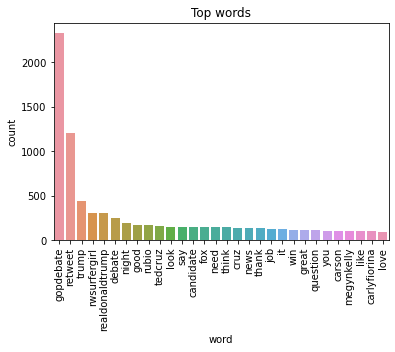

In [22]:
sns.barplot(x='word', y='count', data=df_pos)
plt.xticks(rotation=90)
plt.title("Top words")
plt.show()

In [23]:
from wordcloud import WordCloud

In [24]:
freq_dist_pos = dict(freq_dist_pos)
print(freq_dist_pos)

{'gopdebate': 2325, 'retweet': 1204, 'trump': 440, 'rwsurfergirl': 308, 'realdonaldtrump': 303, 'debate': 250, 'night': 194, 'good': 170, 'rubio': 168, 'tedcruz': 162, 'look': 154, 'say': 149, 'candidate': 148, 'fox': 146, 'need': 146, 'think': 146, 'cruz': 142, 'news': 137, 'thank': 135, 'job': 126, 'it': 124, 'win': 120, 'great': 115, 'question': 114, 'you': 107, 'carson': 107, 'megynkelly': 104, 'like': 104, 'carlyfiorina': 101, 'love': 97}


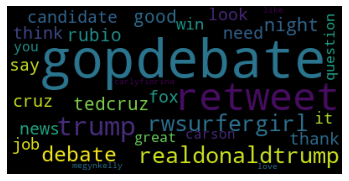

In [25]:
wc_pos = WordCloud().generate_from_frequencies(freq_dist_pos)
# plt.figure(figsize=(10,10))
plt.imshow(wc_pos)
plt.axis('off')
plt.show()

In [26]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [27]:
max_words = 70000
max_len = 100

tk = Tokenizer(num_words=max_words)
tk.fit_on_texts(x)

print(len(tk.word_index))
print(tk.word_counts)

13846
OrderedDict([('retweet', 6224), ('scottwalker', 72), ('catch', 18), ('gopdebate', 11179), ('night', 642), ('scott', 89), ('good', 338), ('line', 50), ('90', 13), ('second', 37), ('walker16', 27), ('httptcozsff', 1), ('robgeorge', 1), ('carly', 93), ('fiorina', 106), ('trend', 5), ('hour', 41), ('debate', 936), ('man', 276), ('justcomplete', 1), ('say', 474), ('danscavino', 14), ('w', 87), ('realdonaldtrump', 935), ('deliver', 9), ('high', 44), ('rating', 135), ('history', 28), ('presidential', 147), ('trump2016', 66), ('httptco', 29), ('gregabbott', 2), ('tx', 5), ('tedcruz', 223), ('on', 31), ('day', 71), ('rescind', 3), ('illegal', 70), ('executive', 13), ('action', 10), ('take', 81), ('barack', 7), ('obama', 143), ('foxnew', 462), ('warriorwoman91', 4), ('like', 656), ('happy', 20), ('hear', 266), ('go', 311), ('moderator', 137), ('anymore', 23), ('megynkelly', 567), ('https', 26), ('deer', 1), ('headlight', 1), ('lizzwinstead', 6), ('ben', 157), ('carson', 288), ('brain', 50)

In [28]:
max_lenth = 100
sequences = tk.texts_to_sequences(x)
x_pad = pad_sequences(sequences,maxlen=max_len)

In [29]:
x_pad.shape

(10729, 100)

In [30]:
print(len(x_pad[50]))
print(len(x_pad[213]))

100
100


In [31]:
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense, LSTM, Embedding,Flatten
import tensorflow as tf
from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [32]:
vocab_size = max_words + 1
embedding_dim = 64
print(vocab_size)
print(embedding_dim)
print(x_pad.shape)

70001
64
(10729, 100)


In [33]:
m1 = Sequential()
m1.add(Embedding(vocab_size,embedding_dim,input_length=x_pad.shape[1]))    
m1.add(LSTM(200, return_sequences=True))
m1.add(Dropout(0.5))
m1.add(LSTM(200,return_sequences=True))
m1.add(Dropout(0.5))
m1.add(LSTM(200))
m1.add(Dropout(0.5))
m1.add(Dense(128))
m1.add(Dropout(0.5))
m1.add(Dense(1,activation='sigmoid'))

m1.compile(loss='binary_crossentropy',optimizer='adam',metrics=['acc'])

In [35]:
h1 = m1.fit(x_pad,y,batch_size=64,epochs=5)

Epoch 1/5
168/168 [==============================] - 231s 1s/step - loss: 0.3451 - acc: 0.8583
Epoch 2/5
168/168 [==============================] - 246s 1s/step - loss: 0.2274 - acc: 0.9080
Epoch 3/5
168/168 [==============================] - 266s 2s/step - loss: 0.1639 - acc: 0.9367
Epoch 4/5
168/168 [==============================] - 261s 2s/step - loss: 0.1231 - acc: 0.9521
Epoch 5/5
168/168 [==============================] - 252s 2s/step - loss: 0.0985 - acc: 0.9623


In [36]:
m1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 64)           4480064   
                                                                 
 lstm (LSTM)                 (None, 100, 200)          212000    
                                                                 
 dropout (Dropout)           (None, 100, 200)          0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 200)          320800    
                                                                 
 dropout_1 (Dropout)         (None, 100, 200)          0         
                                                                 
 lstm_2 (LSTM)               (None, 200)               320800    
                                                                 
 dropout_2 (Dropout)         (None, 200)               0

In [37]:
r1 = pd.DataFrame(h1.history)
r1['Epochs'] = h1.epoch
r1.tail()

,loss,acc,Epochs
0,0.345138,0.858328,0
1,0.227423,0.908006,1
2,0.163930,0.936714,2
3,0.123058,0.952092,3
4,0.098496,0.962252,4


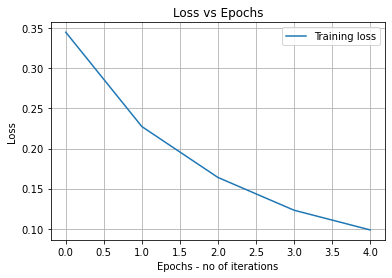

In [60]:
plt.plot(r1['Epochs'],r1['loss'],label='Training loss')
plt.title('Loss vs Epochs')
plt.xlabel('Epochs - no of iterations')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()

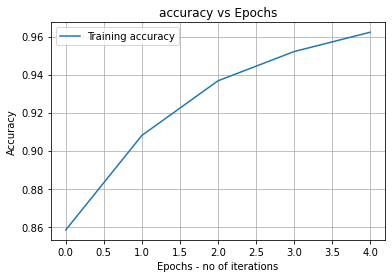

In [39]:
plt.plot(r1['Epochs'],r1['acc'],label='Training accuracy')
# plt.plot(r1['Epochs'],r1['val_accuracy'],label='Testing accuracy')
plt.title('accuracy vs Epochs')
plt.xlabel('Epochs - no of iterations')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()

In [49]:
def predict_tweets_emotion(msg):
    seq = tk.texts_to_sequences(msg)
    pad = pad_sequences(seq, maxlen=100)
    print(pad.shape)
    pred = m1.predict(pad)
    pred_res = [1 if i>0.5 else 0 for i in pred]
    print('pred',pred)
    print('pred_res',pred_res)

### Inference
* Our model is correctly able to predict the negative sentiments but is somehow failing at predicting the positive sentiments. 
* This is due to the imbalance between the positive and negative sentiments in the data provided to us.
* This problem can be rectificed once we balance our data through several balancing techniques like SMOTE, Under Sampling, Over Sampling etc. 

#### 1=Positive
#### 0=Negative

##### Incorrect prediction

In [56]:
msg1 = ['He is a great leader']
predict_tweets_emotion(msg1)

(1, 100)
pred [[0.10938641]]
pred_res [0]


##### Correct Prediction

In [55]:
msg2 = ['He is a terrible leader']
predict_tweets_emotion(msg2)

(1, 100)
pred [[1.0296844e-05]]
pred_res [0]


##### Correct Prediction

In [58]:
msg3 = ['This is an amazing leader']
predict_tweets_emotion(msg3)

(1, 100)
pred [[0.99502766]]
pred_res [1]
